In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [111]:
# Cargamos el archivo
file = pd.read_csv('Automobile_data.csv')
# Eliminamos las columnas con variables categoricas del dataframe 
df= file.loc[:,['body-style','wheel-base','length','width','height','curb-weight','engine-size','compression-ratio','horsepower']]
df = df.drop([131,130],axis=0)
df.head()

,body-style,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower
0,convertible,88.6,168.8,64.1,48.8,2548,130,9.0,111
1,convertible,88.6,168.8,64.1,48.8,2548,130,9.0,111
2,hatchback,94.5,171.2,65.5,52.4,2823,152,9.0,154
3,sedan,99.8,176.6,66.2,54.3,2337,109,10.0,102
4,sedan,99.4,176.6,66.4,54.3,2824,136,8.0,115


In [112]:
all_variables = df.columns
features = list(df)
features.remove('body-style')
target= ['body-style']

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.1250,0.262500
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.1250,0.262500
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.1250,0.441667
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.1875,0.225000
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.0625,0.279167


In [114]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower
0,-7.503107,9.264159,-1.690305,8.325818,-1.667113,7.659358,-1.284034,-0.593135
1,-7.503107,9.264159,-1.690305,8.325818,-1.667113,7.659358,-1.284034,-0.593135
2,270.398205,33.122331,-14.261711,6.941571,0.456770,1.043224,1.338997,-0.460467
3,-219.278498,5.913665,-7.963144,-8.561880,1.872111,-0.477159,-0.355511,0.280761
4,268.245195,-8.416331,-5.177191,3.772377,-3.102142,0.390472,0.692412,0.181256


In [115]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.95541544e-01, 3.22946290e-03, 1.02343415e-03, 1.29727138e-04,
       4.13458713e-05, 2.12290911e-05, 1.04334131e-05, 2.82376716e-06])

In [117]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','target']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,target
0,-7.503107,9.264159,-1.690305,8.325818,-1.667113,7.659358,-1.284034,-0.593135,convertible
1,-7.503107,9.264159,-1.690305,8.325818,-1.667113,7.659358,-1.284034,-0.593135,convertible
2,270.398205,33.122331,-14.261711,6.941571,0.456770,1.043224,1.338997,-0.460467,hatchback
3,-219.278498,5.913665,-7.963144,-8.561880,1.872111,-0.477159,-0.355511,0.280761,sedan
4,268.245195,-8.416331,-5.177191,3.772377,-3.102142,0.390472,0.692412,0.181256,sedan


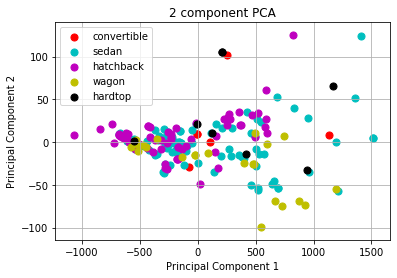

In [123]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['convertible', 'sedan', 'hatchback', 'wagon', 'hardtop']
colors = ['r', 'c', 'm', 'y', 'k']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

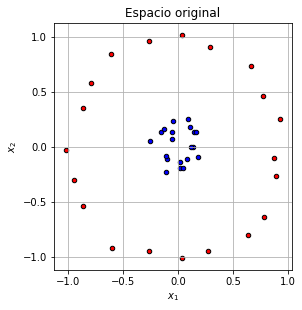

In [132]:
np.random.seed(0)
X, y = make_circles(n_samples=40, factor=.2, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

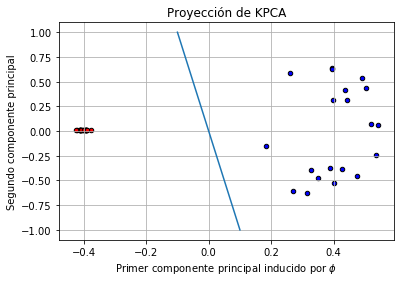

In [133]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(-0.1*x,x,linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()